# User Define Training

In [65]:
import tensorflow as tf

In [66]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=r'D:\다운로드\dataset\Keras\train_dataset_url',
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: D:\다운로드\dataset\Keras\train_dataset_url


In [67]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=r'D:\다운로드\dataset\Keras\train_dataset_url',
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: D:\다운로드\dataset\Keras\train_dataset_url


In [68]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("feature: {}".format(feature_names))
print("label: {}".format(label_name))

feature: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label: species


In [69]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
# mapping 0:setosa, 1:versicolor, 2:virginica

In [70]:
# create tf.data.Dataset 

batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [71]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.4, 6. , 5.7, 5.8, 5.7, 4.9, 6.3, 4.6, 4.4, 4.9, 6.2, 5. , 4.9,
       6.6, 5.8, 6.7, 4.9, 7. , 7.3, 4.4, 5.6, 4.5, 5.8, 5.1, 6.4, 6.5,
       4.8, 5.4, 6.2, 7.7, 6.7, 5.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 2.9, 2.8, 4. , 4.4, 2.5, 2.5, 3.2, 3.2, 3.1, 2.8, 3.4, 3. ,
       2.9, 2.7, 3. , 3.1, 3.2, 2.9, 3. , 2.7, 2.3, 2.7, 3.5, 3.2, 3.2,
       3. , 3. , 3.4, 2.8, 3.1, 3.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 4.5, 4.1, 1.2, 1.5, 4.5, 5. , 1.4, 1.3, 1.5, 4.8, 1.6, 1.4,
       4.6, 5.1, 5.2, 1.5, 4.7, 6.3, 1.3, 4.2, 1.3, 5.1, 1.4, 5.3, 5.1,
       1.4, 4.5, 5.4, 6.7, 5.6, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.9, 1.5, 1.3, 0.2, 0.4, 1.7, 1.9, 0.2, 0.2, 0.1, 1.8, 0.4, 0.2,
       1.3, 1.9, 2.3, 0.1, 1.4, 1.8, 0.2, 1.3, 0.3, 1.9, 0.3,

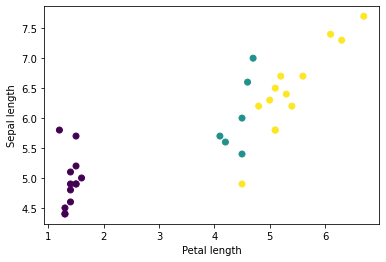

In [72]:
import matplotlib.pyplot as plt

plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [73]:
def pack_features_vector(features, labels):
  # 특성들을 단일 배열로 묶는다.
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [74]:
train_dataset = train_dataset.map(pack_features_vector) 
# (feature, label)쌍의 특성을 훈련 데이터 세트에 쌓아준다. 

In [75]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.  3.3 1.4 0.2]
 [7.6 3.  6.6 2.1]
 [6.4 2.7 5.3 1.9]
 [5.5 2.6 4.4 1.2]
 [4.6 3.1 1.5 0.2]], shape=(5, 4), dtype=float32)


In [76]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [77]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.0692617 , -1.4192319 , -0.37397376],
       [ 0.9826596 , -1.6794202 , -1.1799372 ],
       [ 0.8379441 , -1.3967859 , -1.0271417 ],
       [ 0.8942348 , -1.4255381 , -0.72545123],
       [ 0.9842688 , -1.3173025 , -0.354972  ]], dtype=float32)>

In [78]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.7580367 , 0.06294356, 0.1790198 ],
       [0.84400374, 0.05891391, 0.09708241],
       [0.7924534 , 0.08480917, 0.12273749],
       [0.77145207, 0.07583059, 0.1527173 ],
       [0.7341357 , 0.07348803, 0.19237626]], dtype=float32)>

In [79]:
print("prediction: {}".format(tf.argmax(predictions, axis=1)))
print("label: {}".format(labels))

prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
label: [0 2 2 1 0 2 0 0 1 2 0 2 0 1 2 0 0 0 2 1 0 1 1 2 1 2 2 0 0 1 2 1]


In [80]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [81]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("loss test: {}".format(l))

loss test: 1.7074220180511475


In [82]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

Optimizer는 손실 함수를 최소화하기 위해 계산된 그래디언트를 모델의 변수에 적용해서 모델을 최적화한다. 

In [83]:
# SGD를 구현한 tf.train.GradientDescentOptimizer를 사용한다. 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [84]:
loss_value, grads = grad(model, features, labels)

print("step: {}, loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("step: {}, loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

step: 0, loss: 1.7074220180511475
step: 1, loss: 1.3420640230178833


In [85]:
# 도식화를 위해 결과를 저장
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # 훈련 루프 - 32개의 배치를 사용
  for x, y in train_dataset:
    # 모델을 최적화
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    epoch_loss_avg(loss_value)  # 현재 배치 손실을 추가
    # 예측된 레이블과 실제 레이블 비교
    epoch_accuracy(y, model(x))

  # epoch 종료
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("epoch {:03d}: loss: {:.3f}, accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

epoch 000: loss: 1.149, accuracy: 52.500%
epoch 050: loss: 0.098, accuracy: 97.500%
epoch 100: loss: 0.057, accuracy: 97.500%
epoch 150: loss: 0.087, accuracy: 95.833%
epoch 200: loss: 0.054, accuracy: 98.333%


## 손실함수 시각화

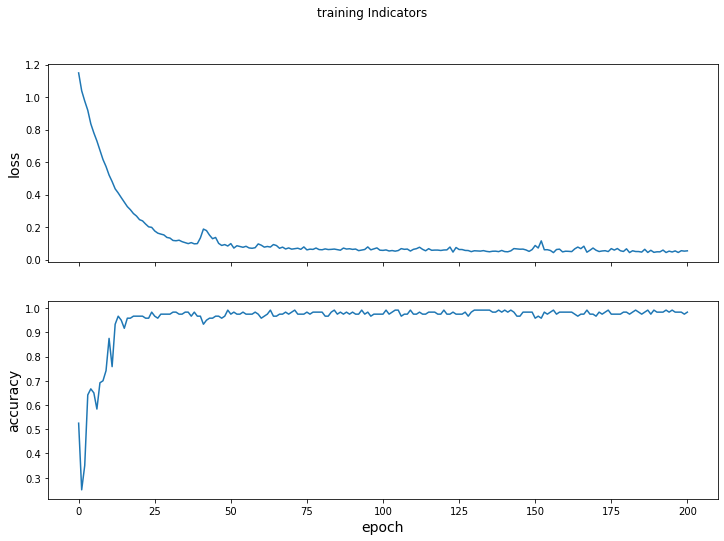

In [86]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('training Indicators')

axes[0].set_ylabel("loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("accuracy", fontsize=14)
axes[1].set_xlabel("epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## 테스트 세트

In [87]:
# 테스트 세트 설정

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=r'D:\다운로드\dataset\Keras\test_url',
                                  origin=test_url)

In [88]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [89]:
# 테스트 세트를 사용해 모델 평가
# 오직 한번의 에포크를 진행한다. 

test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("test set accuracy: {:.3%}".format(test_accuracy.result()))

test set accuracy: 93.333%


In [90]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

## 예측하기

In [91]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("sample {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

sample 0 prediction: Iris setosa (99.9%)
sample 1 prediction: Iris versicolor (99.7%)
sample 2 prediction: Iris virginica (99.8%)
